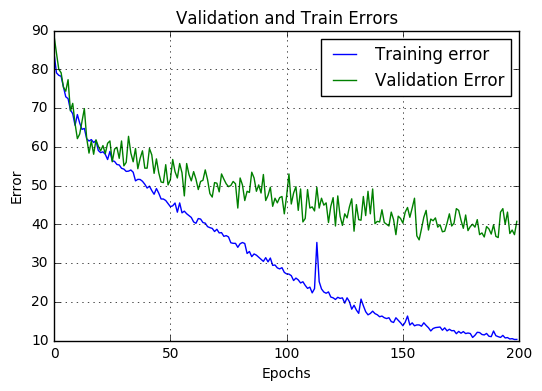

In [2]:
import matplotlib.pyplot as plt
import numpy as np
val = open("valerror_music.log").readlines()
valscore = []
for i in range(0, len(val)):
    valscore.append(float(val[i]))

train = open("trainerror_music.log").readlines()
trainscore = []
for i in range(0, len(val)):
    trainscore.append(float(train[i]))

t = np.arange(len(train))

plt.plot(t, trainscore, label ="Training error")
plt.plot(t, valscore, label = "Validation Error")

plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Validation and Train Errors')
plt.grid(True)
plt.savefig("test.png")
plt.legend()
plt.show()

In [ ]:
#  vgg.lua
local nn = require 'nn'
local Convolution = nn.SpatialConvolutionMM
local Tanh = nn.Tanh
local ReLU = nn.ReLU
local Max = nn.SpatialMaxPooling
local View = nn.View
local Linear = nn.Linear

local cnn = nn.Sequential()

  cnn:add(nn.SpatialConvolution(3,32,3,3,1,1,1,1))
  cnn:add(nn.SpatialBatchNormalization(32))
  cnn:add(nn.ReLU())
  cnn:add(nn.Dropout(0.3))
  cnn:add(nn.SpatialMaxPooling( 2, 2, 2, 2))
  cnn:add(nn.SpatialConvolution(32,64,3,3,1,1,1,1))
  cnn:add(nn.SpatialBatchNormalization(64))
  cnn:add(nn.ReLU())
  cnn:add(nn.Dropout(0.3))
  cnn:add(nn.SpatialMaxPooling( 2, 2, 2, 2))
  cnn:add(nn.SpatialConvolution(64,128,3,3,1,1,1,1))
  cnn:add(nn.SpatialBatchNormalization(128))
  cnn:add(nn.ReLU())
  cnn:add(nn.Dropout(0.4))
  cnn:add(nn.SpatialMaxPooling( 2, 2, 2, 2))
  cnn:add(nn.SpatialConvolution(128,256,3,3,1,1,1,1))
  cnn:add(nn.SpatialBatchNormalization(256))
  cnn:add(nn.ReLU())
  cnn:add(nn.Dropout(0.4))
  cnn:add(nn.SpatialMaxPooling( 2, 2, 2, 2))
  cnn:add(nn.SpatialConvolution(256,512,3,3,1,1,1,1))
  cnn:add(nn.SpatialBatchNormalization(512))
  cnn:add(nn.ReLU())
  cnn:add(nn.SpatialMaxPooling( 2, 2, 2, 2))
  cnn:add(nn.View(512*1*1):setNumInputDims(3))
  cnn:add(nn.Dropout(0.5))
  cnn:add(nn.Linear(512*1*1, 512))
  cnn:add(nn.ReLU())
  cnn:add(nn.Dropout(0.5))
  cnn:add(nn.Linear(512, 43))
  cnn:add(nn.LogSoftMax())

print(cnn)
input = torch.Tensor(1,3,32,32)                        
out = cnn:forward(input)                        
print(out:size())
return cnn